In [1]:
from usde.usde import USDE

In [2]:
usde = USDE()

In [3]:
# The twitter API needs these credentials

twitter_api_credentials = {
    "consumer_key": ' ',
    "consumer_secret": ' ',
    "access_token": ' ',
    "token_secret": ' '
}

In [4]:
twitter = usde.get_twitter(twitter_api_credentials)

# Search tweets by keyword

In [5]:
keyword = "Python"
limit = 5
# call fetch_tweets_by_topic(graph, keyword, limit=15), which will return a graph containing: 
# nodes of tweets, nodes of creators, nodes of original tweet if the tweet returned retweet/quote another tweet
# edges between tweet and creator, tweet and tweet(retweet/quote relationship)
tweets_graph = twitter.fetch_tweets_by_topic(usde.create_graph(), keyword, 5)

In [6]:
# we can get a pandas data frame for tweets
tweets_df = tweets_graph.get_df("tweet")
tweets_df.head()

,_id,Label,label_attribute,created_at,text,source,truncated,is_quote_status,retweet_count,favorite_count,lang,hashtags,urls,media,user_mentions
0,1061858090264522752,tweet_1061858090264522752,tweet,Mon Nov 12 05:47:51 +0000 2018,Weekend Reading: Python https://t.co/tlFgiXDUXC,"<a href=""https://chrome.google.com/webstore/de...",False,False,0,0,en,[],[https://t.co/tlFgiXDUXC],{},[]
1,1061858024694808576,tweet_1061858024694808576,tweet,Mon Nov 12 05:47:36 +0000 2018,Boa regia、[Enygrus] regi[us].、Cenchris regia、P...,"<a href=""http://baaallpypython.ko-me.com/"" rel...",False,False,0,0,ja,[],[https://t.co/YIjWvRbVOI],{},[]
2,1061858019040870400,tweet_1061858019040870400,tweet,Mon Nov 12 05:47:34 +0000 2018,RT @tjmlab: Jupyterをサポートした「Python in Visual St...,"<a href=""http://twitter.com/download/iphone"" r...",False,False,178,0,ja,[],[https://t.co/n62C6g7Zr0],{},[tjmlab]
3,1061239889163780096,tweet_1061239889163780096,tweet,Sat Nov 10 12:51:21 +0000 2018,Jupyterをサポートした「Python in Visual Studio Code」10...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,False,178,338,ja,[],[https://t.co/n62C6g7Zr0],{},[]
4,1061858013038952448,tweet_1061858013038952448,tweet,Mon Nov 12 05:47:33 +0000 2018,RT @larbizard: @r_gellatly @OdooCommunity Data...,"<a href=""http://twitter.com/download/android"" ...",False,False,1,0,en,[python],[],{},"[larbizard, r_gellatly, OdooCommunity]"


In [7]:
# for each tweet, we can get general information:
tweets_df.iloc[0]

_id                                              1061858090264522752
Label                                      tweet_1061858090264522752
label_attribute                                                tweet
created_at                            Mon Nov 12 05:47:51 +0000 2018
text                 Weekend Reading: Python https://t.co/tlFgiXDUXC
source             <a href="https://chrome.google.com/webstore/de...
truncated                                                      False
is_quote_status                                                False
retweet_count                                                      0
favorite_count                                                     0
lang                                                              en
hashtags                                                          []
urls                                       [https://t.co/tlFgiXDUXC]
media                                                             {}
user_mentions                     

In [8]:
# we can get a pandas dataframe for creators of each tweet at the same time
creators_df = tweets_graph.get_df("user")
creators_df.head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,Philippe Hilsz,22972829,Philippe Hilsz,user,hilsz,,http://t.co/iNii5l2nSO,Social technologist,False,False,...,56,2942,Thu Mar 05 20:25:26 +0000 2009,False,en,FFFFFF,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/243393971/...,CC0000,000000
1,ボールパイソンbot（ノーマル）,2233302584,ボールパイソンbot（ノーマル）,user,baaallpythonbot,Ghana⇒Tokyo,https://t.co/mxKGxey2VR,ボールパイソン（ノーマル）です。別名ロイヤルパイソン。ガーナうまれ。男です。よろしくね。好き...,False,False,...,19,110339,Fri Dec 06 17:33:54 +0000 2013,False,ja,FFFFFF,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/4254649780...,857933,333333
2,イナベー,144463127,イナベー,user,inabe49,横浜市,None,プログラミングが趣味な鎌倉の組み込まない系プログラマー兼社畜。,False,False,...,30856,64323,Sun May 16 10:55:29 +0000 2010,True,ja,000000,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/5284459971...,3B94D9,000000
3,Alexandre Fayolle,58841988,Alexandre Fayolle,user,gurneyalex,"Haute-Savoie, France",None,"Python, Debian, vibraphone, cats & jazz",False,False,...,1888,10457,Tue Jul 21 16:30:12 +0000 2009,True,fr,352726,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/4595838852...,AD6D0C,3E4415
4,Peter Python,1053011875007483905,Peter Python,user,Pythondevelopm2,,https://t.co/E8xPs1Mb6z,I will tweet/retweet about interesting topics ...,False,False,...,574,8945,Thu Oct 18 19:56:09 +0000 2018,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/1053012746...,1DA1F2,333333


In [9]:
# We can display screen name of creators
creators_df.screen_name

0              hilsz
1    baaallpythonbot
2            inabe49
3         gurneyalex
4    Pythondevelopm2
Name: screen_name, dtype: object

# Get one user's followers by screen name

In [10]:
screenname = "hilsz"
followers_limit = 3
# call fecth_followers_by_screenname(graph, screenname, limit=15), which will return a graph containing:
# node of user itself and nodes of followers
# edges between user and its followers
followers_graph = twitter.fecth_followers_by_screenname(usde.create_graph(), screenname, followers_limit)

In [11]:
# we can get list of nodes
nodes = followers_graph.get_nodes()
# we can print type of nodes:
print(nodes.keys())

dict_keys(['user'])


In [12]:
# we get list of nodes includes a user node and three followers nodes
nodes["user"].head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,Philippe Hilsz,22972829,Philippe Hilsz,user,hilsz,,http://t.co/iNii5l2nSO,Social technologist,False,False,...,56,2942,Thu Mar 05 20:25:26 +0000 2009,False,en,FFFFFF,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/243393971/...,CC0000,000000
1,anitrons,861802095426535424,anitrons,user,anitrons1,,https://t.co/2cpn0tsBKa,Reviews at the Best!,False,False,...,858,4422,Tue May 09 04:36:45 +0000 2017,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/8618431922...,1DA1F2,333333
2,Jean-Louis Galano,967596638,Jean-Louis Galano,user,jlgalano,Vauhallan,https://t.co/EDWa3MqC7u,,False,False,...,1,10,Sat Nov 24 08:09:29 +0000 2012,False,fr,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/2888946037...,1B95E0,000000
3,Robin Specht,593789805,Robin Specht,user,RobinSpecht,,None,,False,False,...,0,3,Tue May 29 13:30:35 +0000 2012,False,fr,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/2260389801...,1DA1F2,333333


In [13]:
# we can also get a list of edges
edges = followers_graph.get_edges()
# we can print type of edges:
print(edges.keys())

dict_keys(['follow', 'followed by'])


In [14]:
# we get list of edges between user node and follower nodes: follower -> user
edges["followed by"].head()

,Source,Target,Label,label_attribute,_id
0,22972829,861802095426535424,FOLLOWED BY,FOLLOWED BY,22972829861802095426535424FOLLOWED BY
1,22972829,967596638,FOLLOWED BY,FOLLOWED BY,22972829967596638FOLLOWED BY
2,22972829,593789805,FOLLOWED BY,FOLLOWED BY,22972829593789805FOLLOWED BY


# Get one user's friends by screen name

In [15]:
# we can also call fecth_friends_by_screenname(graph, screenname, limit=15), which will return a graph containing:
# node of user itself and nodes of followers
# edges between user and its friends
friends_limit = 3
friends_graph = twitter.fecth_friends_by_screenname(usde.create_graph(), screenname, friends_limit)

# Get single user's information by screen name

In [16]:
# We can also call fetch_user_by_screenname(self, graph, screenname), which will return a graph containig a user node:
single_user_graph = twitter.fetch_user_by_screenname(usde.create_graph(), screenname)

# Get single tweet's information by tweet id

In [17]:
# We can also call fetch_tweet_by_id(self, graph, id), which will return a graph containig a tweet node:
id = 1061858090264522752
single_tweet_graph = twitter.fetch_tweet_by_id(usde.create_graph(), id)

# Export a graph to CSV file

In [18]:
# We can call export_all_CSV() on the graph desired
# then graph can be showed via gephi, cytoscape, etc. takes CSV files
tweets_graph.export_all_CSV("tweets_searched_by_Python")

In [19]:
# We cam also specify we want to export by calling export_CSV()
tweets_graph.export_CSV("tweets_searched_by_Python_partial", {"user"}, {"created by"})

# Visualization with NetworkX

In [20]:
import networkx as nx
# First, create a graph
nx_graph = nx.Graph()

In [21]:
# We will visualize followers_graph
followers_graph_edges = followers_graph.get_edges()
followers_graph_nodes = followers_graph.get_nodes()

In [22]:
# We can create graph from edgelist dataframes
for key in followers_graph_edges:
    new_graph = nx.from_pandas_edgelist(followers_graph_edges[key], source="Source", target="Target", edge_attr=True)
    nx_graph = nx.compose(nx_graph, new_graph)

In [23]:
# Add node attributes
for key in followers_graph_nodes:
    df = followers_graph_nodes[key]
    
    for index, row in df.iterrows():
        _id = row["_id"]
        node = nx_graph.node[_id]
        
        for row_key in row.keys():
            node[row_key] = row[row_key]

In [24]:
# Show nodes in the NetworkX graph
list(nx_graph.nodes(data=True))

[('861802095426535424',
  {'name': 'anitrons',
   '_id': '861802095426535424',
   'Label': 'anitrons',
   'label_attribute': 'user',
   'screen_name': 'anitrons1',
   'location': '',
   'url': 'https://t.co/2cpn0tsBKa',
   'description': 'Reviews at the Best!',
   'protected': False,
   'verified': False,
   'followers_count': 1505,
   'friends_count': 1563,
   'listed_count': 0,
   'favourites_count': 858,
   'statuses_count': 4422,
   'created_at': 'Tue May 09 04:36:45 +0000 2017',
   'geo_enabled': False,
   'lang': 'en',
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_image_url': 'http://pbs.twimg.com/profile_images/861843192248971264/KCH5IyPW_normal.jpg',
   'profile_link_color': '1DA1F2',
   'profile_text_color': '333333'}),
 ('22972829',
  {'name': 'Philippe Hilsz',
   '_id': '22972829',
   'Label': 'Philippe Hilsz',
   'label_attribute': 'user',
   'screen_name': 'hilsz',
   'location': '',
   'url': 'http://t.co/iNii5l2nSO',
   'de

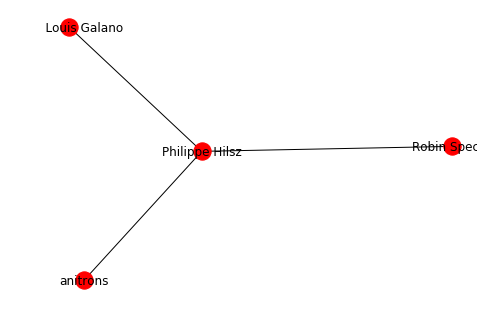

In [26]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in nx_graph.nodes(data=True))
nx.draw(nx_graph, labels=labels)